<a href="https://colab.research.google.com/github/chhocker/cse380-notebooks/blob/master/wrapping_up_week_four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# grading notes
Be sure to include the packages installed from pip in a code block. Then graders can optionally run that code block and things will not break.

For example, see the code block below.

In [1]:
!pip install pyprimesieve

  Created wheel for pyprimesieve: filename=pyprimesieve-0.1.6-cp36-cp36m-linux_x86_64.whl size=367945 sha256=19ebce07a87058a46a629efbd25ae6a2a9dadfb4ffa8168045000bdb87b252fa
  Stored in directory: /root/.cache/pip/wheels/c4/63/2b/a485079de882a375d28a4dc141386c76ea9a6aaad505f2198b
Successfully built pyprimesieve


Otherwise, this looks good.

# Wrapping Up Week Four
  At the end (of class meetings) of this fourth week, let's recap:
## GCD
  Revisiting this important concept one more time:
### Important?
   Important enough to be a library-import away:

In [2]:
from math import gcd

print(gcd(89932875987987948500007, 5677777777777777777777))

1


### Trace and Test

In [3]:
from math import floor, log10

def trace_gcd(a, b):
    r = -1
    num_digits_in_a = str(floor(log10(a)) + 1)
    num_digits_in_b = str(floor(log10(b)) + 1)
    num_digits_in_r = str(floor(log10(a % b)) + 1)
    format_specifier = '{0:' + num_digits_in_a + \
                       '} = {1:' + num_digits_in_b + \
                       '}({2}) + {3:' + num_digits_in_r + '}'
    while r:
        q = a // b
        r = a % b
        print(format_specifier.format(a, b, q, r))
        a, b = b, r

In [4]:
trace_gcd(87,55)

87 = 55(1) + 32
55 = 32(1) + 23
32 = 23(1) +  9
23 =  9(2) +  5
 9 =  5(1) +  4
 5 =  4(1) +  1
 4 =  1(4) +  0


In [5]:
trace_gcd(89, 56)

89 = 56(1) + 33
56 = 33(1) + 23
33 = 23(1) + 10
23 = 10(2) +  3
10 =  3(3) +  1
 3 =  1(3) +  0


In [6]:
trace_gcd(56, 89)

56 = 89(0) + 56
89 = 56(1) + 33
56 = 33(1) + 23
33 = 23(1) + 10
23 = 10(2) +  3
10 =  3(3) +  1
 3 =  1(3) +  0


In [7]:
from fractions import Fraction as frac

def contfrac2frac(seq):
    """Convert the simple continued fraction in `seq`
       into a fraction with numerator num and denominator den.
    """
    num, den = 1, 0
    for u in reversed(seq):
        num, den = den + num * u, num
    return frac(num, den)

def frac2contfrac(f):
    """Build the simple continued fraction expansion of fraction f.
    """
    seq = []
    frac2contfrac_rec(f, seq)
    return seq

def frac2contfrac_rec(f, seq):
    n = f.numerator
    d = f.denominator
    if d != 0:
        seq.append(n // d)
        if n % d != 0:
            frac2contfrac_rec(frac(d, n % d), seq)

def e_cont_frac(n):
    """Build `n` terms of the simple continued fraction expansion of e
        `n` must be a positive integer
    """
    seq = [2 * (i + 1) // 3 if i % 3 == 2 else 1 for i in range(n)]
    seq[0] += 1
    return seq

def eval_frac(f):
    """Evaluate the fraction f as a float.
    """
    return f.numerator / f.denominator

In [8]:
print(frac2contfrac(frac(89, 56)))

[1, 1, 1, 2, 3, 3]


In [9]:
from math import sqrt

phi = (sqrt(5) + 1) / 2
print(phi)

phi_as_frac = frac(phi).limit_denominator(10000000)

cfr_phi_as_frac = frac2contfrac(phi_as_frac)
print(cfr_phi_as_frac)
print(all(map(lambda x: x == 1, cfr_phi_as_frac[:-1])))

1.618033988749895
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
True


In [10]:
trace_gcd(377, 233)

377 = 233(1) + 144
233 = 144(1) +  89
144 =  89(1) +  55
 89 =  55(1) +  34
 55 =  34(1) +  21
 34 =  21(1) +  13
 21 =  13(1) +   8
 13 =   8(1) +   5
  8 =   5(1) +   3
  5 =   3(1) +   2
  3 =   2(1) +   1
  2 =   1(2) +   0


In [11]:
trace_gcd(899, 493)

899 = 493(1) + 406
493 = 406(1) +  87
406 =  87(4) +  58
 87 =  58(1) +  29
 58 =  29(2) +   0


## Now, about that Stern-Brocot Tree Address!

   5/2 is at address 110, equals 2.5000000

In [12]:
trace_gcd(5, 2)

5 = 2(2) + 1
2 = 1(2) + 0


8/3 is at address 1101, equals 2.666666...

In [13]:
trace_gcd(8, 3)

8 = 3(2) + 2
3 = 2(1) + 1
2 = 1(2) + 0


11/4 is at address 11011, equals 2.7500000...

In [14]:
trace_gcd(11, 4)

11 = 4(2) + 3
 4 = 3(1) + 1
 3 = 1(3) + 0


19/7 is at address 110110, equals 2.7142857...

In [15]:
trace_gcd(19, 7)

19 = 7(2) + 5
 7 = 5(1) + 2
 5 = 2(2) + 1
 2 = 1(2) + 0


30/11 is at address 1101101, equals 2.7272727...

In [16]:
trace_gcd(30, 11)

30 = 11(2) + 8
11 =  8(1) + 3
 8 =  3(2) + 2
 3 =  2(1) + 1
 2 =  1(2) + 0


49/18 is at address 11011010, equals 2.7222222...

In [17]:
trace_gcd(49, 18)

49 = 18(2) + 13
18 = 13(1) +  5
13 =  5(2) +  3
 5 =  3(1) +  2
 3 =  2(1) +  1
 2 =  1(2) +  0


In [18]:
print(frac2contfrac(frac(49, 18)))

[2, 1, 2, 1, 1, 2]


87/32 is at address 1101101000, equals 2.7187500...

In [19]:
trace_gcd(87, 32)

87 = 32(2) + 23
32 = 23(1) +  9
23 =  9(2) +  5
 9 =  5(1) +  4
 5 =  4(1) +  1
 4 =  1(4) +  0


106/39 is at address 11011010000, equals 2.7179487...

In [20]:
trace_gcd(106, 39)

106 = 39(2) + 28
 39 = 28(1) + 11
 28 = 11(2) +  6
 11 =  6(1) +  5
  6 =  5(1) +  1
  5 =  1(5) +  0


In [21]:
print('{0:.50f}'.format(1038929163353808 / 382200680031313))

2.71828182845904509079559829842764884233474731445312


In [22]:
from mpmath import mp
mp.dps = 50
print(mp.fdiv(1038929163353808, 382200680031313))

2.7182818284590452353602874713492485633715800289396


In [23]:
from math import e
e_as_frac = frac(e).limit_denominator(10000000000000000)
print(e_as_frac, frac2contfrac(e_as_frac))
print(e_cont_frac(20))

6121026514868073/2251799813685248 [2, 1, 2, 1, 1, 4, 1, 1, 6, 1, 1, 8, 1, 1, 10, 1, 1, 12, 1, 1, 11, 1, 1, 1, 11, 5, 1, 1, 2, 1, 4, 2, 1, 1, 9, 17, 3]
[2, 1, 2, 1, 1, 4, 1, 1, 6, 1, 1, 8, 1, 1, 10, 1, 1, 12, 1, 1]


In [24]:
print(contfrac2frac([2,1,2,1,1,4,1,1,6,1,1,8,1,1,10,1,1,12,1,1,14,1,1,16,1,1,18,1,1,20,1,1,22,1,1,24]))

52061284670617417/19152276311294112


In [25]:
from mpmath import mp
mp.dps = 50
print(mp.fdiv(52061284670617417, 19152276311294112))

2.7182818284590452353602874713526638578384660674105


## Answer Selected Questions
### 1
How can relations be encoded as sets of pairs?
#### Answer
Try it!

In [26]:
from pyprimesieve import primes
# ftmpl = first ten million primes list
ftmpl = list(primes(1, 179424674))
print(len(ftmpl))
def encode_set(nset):
  return encode_set(nset[1:]) * ftmpl[nset[0]] if nset else 1

10000000


In [27]:
print(ftmpl[0])

2


In [28]:
def encode_set(nset):
  return encode_set(nset[1:]) * ftmpl[nset[0]] if nset else 1

In [29]:
print(encode_set([1, 2, 3]))

105


In [30]:
R = [(1, 2), (2, 3), (1, 3)]
print(R)
pair_encodings = list(map(encode_set, R))
print(pair_encodings)
encoding_of_R = encode_set(pair_encodings)
print(encoding_of_R)

[(1, 2), (2, 3), (1, 3)]
[15, 35, 21]
632237


### 2
Why is an ordered set which is reflexive, antisymmetric, and transitive called a partial order? If all the elements preceding a given element are less than in comparable value and a set can have no duplicates (meaning if x and y as elements of set S are equal by x = y, then they are duplicates), why is it called a partial order? It sounds to me more like a total order - a complete order. Incomplete is a synonym to partial, the opposite of complete.
#### Answer
What we have here is a category error.

A Partial Order is a *relation*, not a set.

A poster-child poset is the pair (P(S), $\subseteq$). For example:

Given S = {1, 2, 3, 4}, P(S) = Power Set of S = {$\emptyset$, {1}, {2}, {3}, {4}, {1, 2}, {1, 3}, {1, 4}, {2, 3}, {2, 4}, {3, 4}, {1, 2, 3}, {1, 2, 4}, {1, 3, 4}, {2, 3, 4}, {1, 2, 3, 4}}.

---

Here is how to draw the Hasse diagram of this poset using dot:


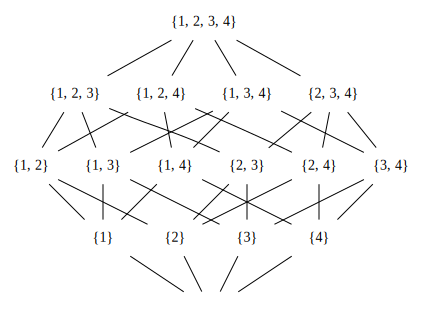

In [31]:
from graphviz import Source
Source('''
graph {
  node [shape=none]
  1234 [label="{1, 2, 3, 4}"]
   123 [label="{1, 2, 3}"]
   124 [label="{1, 2, 4}"]
   134 [label="{1, 3, 4}"]
   234 [label="{2, 3, 4}"]
    12 [label="{1, 2}"]
    13 [label="{1, 3}"]
    14 [label="{1, 4}"]
    23 [label="{2, 3}"]
    24 [label="{2, 4}"]
    34 [label="{3, 4}"]
     1 [label="{1}"]
     2 [label="{2}"]
     3 [label="{3}"]
     4 [label="{4}"]
     0 [label=<&empty;>]
  1234 -- {123, 124, 134, 234}
   123 -- {12, 13, 23}
   124 -- {12, 14, 24}
   134 -- {13, 14, 34}
   234 -- {23, 24, 34}
    12 -- {1, 2}
    13 -- {1, 3}
    14 -- {1, 4}
    23 -- {2, 3}
    24 -- {2, 4}
    34 -- {3, 4}
     1 -- 0
     2 -- 0
     3 -- 0
     4 -- 0
  {rank=same 1234}
  {rank=same 123 124 134 234}
  {rank=same 12 13 14 23 24 34}
  {rank=same 1 2 3 4}
  {rank=same 0}
}
''')

### 3
From the reading we learn that a Gödel hash can uniquely identify the original object. Does this mean that most hashes are larger than their original objects?
#### Answer
It depends on the prime map and the elements being hashed.

### 4
As defined in the book, "An equivalence relation is a binary relation that is reflexive, symmetric, and transitive." This being the case, if a relation is symmetric and transitive, would it not also **have** to be reflexive? Why or why not?
#### Answer
The is-sibling-of relation is symmetric and transitive, but not reflexive.

### 5
In the book an example is given of a relation $R_1 = \{(1, 1)\}$, which is characterized as both symmetric and antisymmetric. With the standard meaning of the word symmetry it's hard to envision how something could be both symmetric and antisymmetric. Are the only relations that possess both properties those in which x = y?
#### Answer
Yes. In fact, any subset of the identity relation possesses both.

(Note: The empty relation vacuously does too.)

### 6
What, exactly, is the prime basis of a poset?

According to the reading, the prime basis is a subset of the poset. Also, "A poset has a prime basis if every (non-bottom) element has a unique decomposition as the least upper bound of a finite number of basis elements." Is this saying that each element in the poset has a unique decomposition, or each element in the prime basis has a unique decomposition?
#### Answer
A good example, related to the poster-child poset mentioned earlier, is given in V.B.d) *factorable power sets*: A partially ordered power set (P(S), ⊆) where the order is inclusion is easily factorable: its prime basis, $B_{P(S)}$, consists of the singleton sets over $S: \{\{s\} : s \in S\}$.

### 7
When considering binary relations, does a partial order always imply divisibility? If so, is this the reason Gödel hashes are considered partial order-preserving?
#### Answer
"Divides" (e.g. 3 | 12) is a partial order. It can profitably be thought of when pondering the abstract nature of these objects.

## For Your Consideration, Profit, and Learning
There's a feature column of the American Mathematical Society called *Monthly essays on mathematical topics*. Here's one:

https://www.ams.org/publicoutreach/feature-column/fcarc-stern-brocot

The above link to the original AMS site is broken sometimes, or the images are broken, so here's a PDF version someone captured:

https://gaurish4math.files.wordpress.com/2016/10/feature-column-from-the-ams.pdf

